In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy
from scipy.signal import convolve
from scipy import ndimage
import getBayer
% matplotlib inline
import io
import time
import copy
from numpy.lib.stride_tricks import as_strided

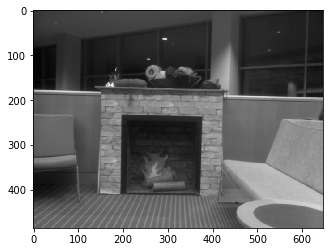

In [3]:
res = getBayer.get_bw_array('pic2.jpeg')
testIm = copy.deepcopy(res)
testIm = scipy.misc.imresize(testIm, .25)
plt.imshow(testIm, cmap = 'gray')

In [4]:
m = testIm.shape[0]
n = testIm.shape[1]
k = 6 # divide into chunks
print(n//k)
print(m//k)
h = m//k
w = n//k

108
81


In [17]:
chunk1 = testIm[0:k,0:k]
vect1 = np.reshape(chunk1, (k*k,1))
# print(vect1)
# X = copy.deepcopy(vect1)
# X.shape

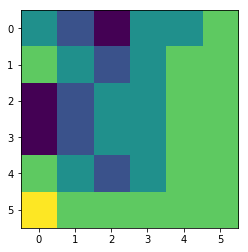

In [18]:
testChunk = testIm[k:2*k,0:k]
plt.imshow(testChunk/255)

In [19]:

for i in range(0,n,k):
    for j in range(0,m,k):
        chunk = testIm[j:j+k,i:i+k]
        if j == 0 and i ==0:
            X = np.reshape(chunk, (k*k, 1))
        else:
            X = np.append(X, np.reshape(chunk, (k*k, 1)),axis=1)

In [20]:
X.shape

(36, 8748)

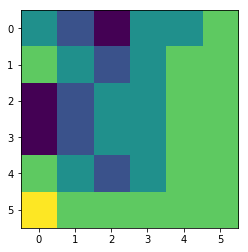

In [22]:
plt.imshow(np.reshape(X[:,1],(k,k))/255)

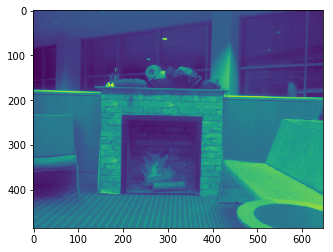

In [25]:
reMos = np.zeros(testIm.shape)
count = 0
for ii in range(0,n,k):
    for jj in range(0,m,k):
    
        vec = X[:,count]
        reMos[jj:jj+k, ii:ii+k] = np.reshape(vec,(k,k))
        count += 1 
        
plt.imshow(reMos/255)

In [40]:

def getLPG(im, k):
    """takes in an image and a chunk size, divides the image into chunks and vectorizes them. 
    Returns matrix composed of k*k vectors"""
    m = im.shape[0]
    n = im.shape[1]
    h = m//k
    w = n//k
    for i in range(0,n,k):
        for j in range(0,m,k):
            chunk = im[j:j+k,i:i+k]
            if j == 0 and i ==0:
                X = np.reshape(chunk, (k*k, 1))
            else:
                X = np.append(X, np.reshape(chunk, (k*k, 1)),axis=1)

    return X

def reMosaic(X, imshape, k):
    reMos = np.zeros(imshape)
    m = imshape[0]
    n = imshape[1]
    count = 0
    for ii in range(0,n,k):
        for jj in range(0,m,k):
            vec = X[:,count]
            reMos[jj:jj+k, ii:ii+k] = np.reshape(vec,(k,k))
            count += 1 
    return reMos


In [43]:
X = getLPG(testIm, 6)



(36, 8748)

In [57]:
XT= np.transpose(X)
meanChunk = np.dot(XT, np.ones((36,1)))
meanChunk = meanChunk/X.shape[1]

